Linear regression is just the base that we build on. Real world problems often requires more sophisticated non-linear models.
How Non-linear? 
-  Quadratic
-  Exponential
-  Logistic


<p style="text-align: center">
  <img  src="../../../Media/logistic-regression.png" width="600" alt="Logistic-Regression">
</p>

The possible outcomes of a logistic regression are not numerical. But rather Categorical. We can predict categorical outcomes through a logistic regression

<p style="text-align: center">
  <img  src="../../../Media/logistic-regression-2.png" width="600" alt="Logistic-Regression">
</p>

Similar to our SAT GPA simple linear regression example, In this section we will explore SAT Admissions problem.
Our focus will be predicting whether a student will be admitted or not

## Import the relevant libraries

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [61]:
raw_data = pd.read_csv("../../Data/admittance.csv")
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


Like dummies, we must convert Yes/No entries to 1s and 0s to be able to use the data for quantitative analysis.

In [62]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})

In [63]:
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


## Variables

In [64]:
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

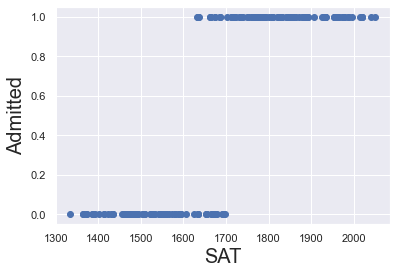

In [65]:
plt.scatter(x,y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()
## this what happen when we deal with categorical outcomes

In [24]:
## Its clear to note that a linear regression is not a fit for this kind of analysis, thus, we must use a non-linear approaches!

In [69]:
x=sm.add_constant(x1)

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


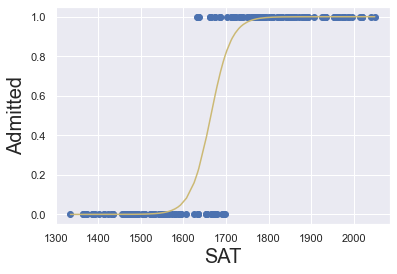

In [70]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()

### Interpretation

The function shows the probability of an admission given and SAT score.
When an SAT score is relatively low, the probability of getting admitted is 0
When an SAT score is relatively high, the probability of getting admitted is 1
A score between 1600 and 1750 is uncertain, so there is a probability associated with it.
For instance, if you score 1650, you have roughly 50% chance of getting admitted. 
